# PCA - Face Feature Extraction

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
n_images, h, w = lfw_people.images.shape
#plt.imshow(lfw_people.images[1100])
#plt.show()

In [44]:
X = lfw_people.data
n_features = X.shape[1]
print(n_features)
X.shape

1850


(1288, 1850)

In [45]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print(n_classes)

7


In [46]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

print(X_norm.shape)

(1288, 1850)


### PCA

In [47]:
# Compute PCA(eigen faces) on facedata set
n_components = 150
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_norm)
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenfaces.shape

(150, 50, 37)

In [48]:
# Top n_component features of face dataset using pca
X_norm_pca = pca.transform(X_norm)
X_norm_pca.shape

(1288, 150)

In [49]:
# Function to plot a gallery of portraits
def plot_gallery(images, titles, h, w, n_row=3, n_col=4): 
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

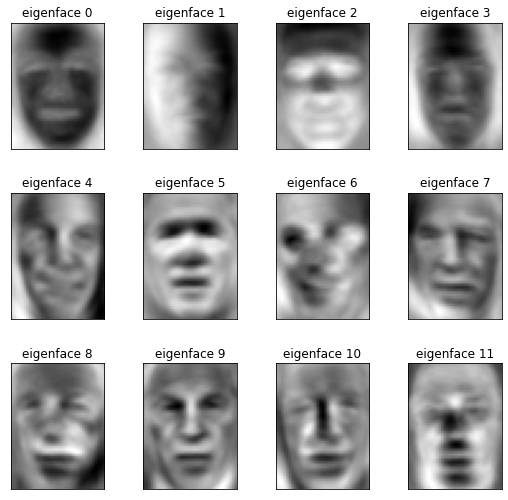

In [50]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()